# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Decision Tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Import Data

In [3]:
diabetes= pd.read_excel("/Users/MansfieldsMac/Desktop/fall20/PICmath/Diabetes Program for PICMath Final zeros.xlsx")

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
diabetes.head()

Member ID Urban or Rural  Age  HeartDisease 2020  Diabetes 2020  \
0       1049          Rural   47                150            128   
1       1095          Rural   59                144            142   
2       1602          Rural   34                101            120   
3       1065          Urban   51                146            147   
4       1206          Urban   65                136            132   

   EmotionalHealth 2020  Cancer 2020  WholeHealthIndex 2020  \
0                    46           90                  -21.9   
1                    52           63                    2.6   
2                    15           29                   27.6   
3                    71           55                   -3.3   
4                    46           50                    0.6   

   HealthAwarenessIndex 2020  BiometricIndex 2020  FinancialHealthIndex 2020  \
0                         52                 28.0                       81.0   
1                         65                 56.0                       83.0   
2                        101                 28.0                       95.0   
3                         85                 50.0                       86.0   
4                         89                  5.0                       82.0   

   AlcoholUse 2020  MedicalAdherence 2020  Nutrition 2020  \
0               16                    9.0              37   
1                0                   11.0              24   
2                3                    9.0              19   
3               35                   11.0              75   
4                0                    9.0              32   

   PhysicalActivity 2020  TobaccoUse 2020  WeightManagement 2020  \
0                     96               81                    180   
1                     97                0                    180   
2                     53                0                    180   
3                     71                0                    180   
4                     93                0                    180   

   Depression 2020  Stress 2020  Sleep 2020  BMI 2020  Systolic 2020  \
0               35         35.0          31     34.95          130.0   
1               14         25.0          56     38.38          157.0   
2                7          3.0          31     46.20          166.0   
3               35         53.0          90     40.92          132.0   
4                7         10.0          78     33.25          142.0   

   Diastolic 2020  TotalCholesterol 2020  LDL 2020  HDL 2020  \
0            80.0                  173.0       NaN      26.0   
1            77.0                  177.0       NaN      41.0   
2            87.0                  208.0       NaN      40.0   
3            73.0                  134.0      74.0      37.0   
4            86.0                  271.0       NaN      37.0   

   Triglyceride 2020  HgbA1C 2020  HeartDisease 2019  Diabetes 2019  \
0              427.0          5.7                113            115   
1                NaN          7.6                140            141   
2                NaN         11.5                104            123   
3              114.0          9.5                140            153   
4                NaN         10.8                128            128   

   EmotionalHealth 2019  Cancer 2019  WholeHealthIndex 2019  \
0                    29           35                   22.6   
1                    52           59                    2.8   
2                    20           33                   30.1   
3                    50           57                    0.9   
4                    35           48                   10.6   

   HealthAwarenessIndex 2019  BiometricIndex 2019  FinancialHealthIndex 2019  \
0                         85                   42                       83.0   
1                         69                   42                       79.0   
2                         76                   72                       91.0   
3 

# New Variables

### Urban or Rural

In [5]:
diabetes["Urban or Rural"] = diabetes["Urban or Rural"].astype('category')

In [6]:
# encoding Urban or Rural feature into dummy variable (0 - Rural, 1 - Urban)

diabetes["Urban or Rural dummy"] = diabetes["Urban or Rural"].cat.codes

### Coaching Sessions

In [7]:
# changing data type for Coaching Sessions to categorical type

diabetes[["Coaching Session Quarter 1 FY20", "Coaching Session Quarter 2 FY20", "Coaching Session Quarter 3 FY20", "Coaching Session Quarter 4 FY20", "Coaching Session Quarter 3 FY19", "Coaching Session Quarter 4 FY19"]] = diabetes[["Coaching Session Quarter 1 FY20", "Coaching Session Quarter 2 FY20", "Coaching Session Quarter 3 FY20", "Coaching Session Quarter 4 FY20", "Coaching Session Quarter 3 FY19", "Coaching Session Quarter 4 FY19"]].astype('int')

### A1C

In [8]:
diabetes["A1C Change"] = diabetes["HgbA1C 2020"] - diabetes["HgbA1C 2019"]

In [9]:
# 0 = decrease, 1 = increase

def func(x):
    if x > 0:
        return 'Increase A1C'
    else :
        return 'Decrease A1C'

diabetes['PosorNegA1C'] = diabetes['A1C Change'].apply(func)

In [10]:
diabetes["PosorNegA1C"] = diabetes["PosorNegA1C"].astype('category')
diabetes["Urban or Rural dummy"] = diabetes["Urban or Rural dummy"].astype('category')

In [11]:
labbins = [0, 6.9, 7.5, 8.5, 30]
labnames = ['Good', 'Moderate', 'Poor', 'Very Poor']

dLab = dict(enumerate(labnames, 1))

In [12]:
diabetes['HgbA1C 2019 Control'] = np.vectorize(dLab.get)(np.digitize(diabetes['HgbA1C 2019'], labbins))
diabetes["HgbA1C 2019 Control"] = diabetes["HgbA1C 2019 Control"].astype('category')

In [13]:
diabetes['HgbA1C 2020 Control'] = np.vectorize(dLab.get)(np.digitize(diabetes['HgbA1C 2020'], labbins))
diabetes["HgbA1C 2020 Control"] = diabetes["HgbA1C 2020 Control"].astype('category')

In [14]:
def func2(x):
    if x == "Good":
        return 4
    if  x == "Moderate":
        return 3
    if x == "Poor":
        return 2
    else :
        return 1

diabetes['A1C2019num'] = diabetes['HgbA1C 2019 Control'].apply(func2)

In [15]:
def func3(x):
    if x == "Good":
        return 4
    if  x == "Moderate":
        return 3
    if x == "Poor":
        return 2
    else :
        return 1

diabetes['A1C2020num'] = diabetes['HgbA1C 2020 Control'].apply(func3)

In [16]:
diabetes['A1C2019num'] = diabetes['A1C2019num'].astype('int')

In [17]:
diabetes["A1C Cat Change"] = diabetes["A1C2020num"] - diabetes["A1C2019num"]

In [18]:
diabetes["A1C Cat Change"].max()

3

In [19]:
def func4(x):
    if x == 0:
        return "Same Control Group"
    if  x > 0:
        return "Better Control Group"
    else :
        return "Worse Control Group"

diabetes['ControlChange'] = diabetes['A1C Cat Change'].apply(func4)
diabetes['A1C Cat Change'] = diabetes['A1C Cat Change'].astype('category')
diabetes['ControlChange'] = diabetes['ControlChange'].astype('category')

### Age

In [20]:
agebins = [0, 30, 40, 50, 60, 70]
agenames = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

dAge = dict(enumerate(agenames, 1))

In [21]:
diabetes['Age Range'] = np.vectorize(dAge.get)(np.digitize(diabetes['Age'], agebins))
diabetes['Age Range'] = diabetes['Age Range'].astype('category')

### 2019 to 2020 Change Variables

In [22]:
diabetes.head()

Member ID Urban or Rural  Age  HeartDisease 2020  Diabetes 2020  \
0       1049          Rural   47                150            128   
1       1095          Rural   59                144            142   
2       1602          Rural   34                101            120   
3       1065          Urban   51                146            147   
4       1206          Urban   65                136            132   

   EmotionalHealth 2020  Cancer 2020  WholeHealthIndex 2020  \
0                    46           90                  -21.9   
1                    52           63                    2.6   
2                    15           29                   27.6   
3                    71           55                   -3.3   
4                    46           50                    0.6   

   HealthAwarenessIndex 2020  BiometricIndex 2020  FinancialHealthIndex 2020  \
0                         52                 28.0                       81.0   
1                         65                 56.0                       83.0   
2                        101                 28.0                       95.0   
3                         85                 50.0                       86.0   
4                         89                  5.0                       82.0   

   AlcoholUse 2020  MedicalAdherence 2020  Nutrition 2020  \
0               16                    9.0              37   
1                0                   11.0              24   
2                3                    9.0              19   
3               35                   11.0              75   
4                0                    9.0              32   

   PhysicalActivity 2020  TobaccoUse 2020  WeightManagement 2020  \
0                     96               81                    180   
1                     97                0                    180   
2                     53                0                    180   
3                     71                0                    180   
4                     93                0                    180   

   Depression 2020  Stress 2020  Sleep 2020  BMI 2020  Systolic 2020  \
0               35         35.0          31     34.95          130.0   
1               14         25.0          56     38.38          157.0   
2                7          3.0          31     46.20          166.0   
3               35         53.0          90     40.92          132.0   
4                7         10.0          78     33.25          142.0   

   Diastolic 2020  TotalCholesterol 2020  LDL 2020  HDL 2020  \
0            80.0                  173.0       NaN      26.0   
1            77.0                  177.0       NaN      41.0   
2            87.0                  208.0       NaN      40.0   
3            73.0                  134.0      74.0      37.0   
4            86.0                  271.0       NaN      37.0   

   Triglyceride 2020  HgbA1C 2020  HeartDisease 2019  Diabetes 2019  \
0              427.0          5.7                113            115   
1                NaN          7.6                140            141   
2                NaN         11.5                104            123   
3              114.0          9.5                140            153   
4                NaN         10.8                128            128   

   EmotionalHealth 2019  Cancer 2019  WholeHealthIndex 2019  \
0                    29           35                   22.6   
1                    52           59                    2.8   
2                    20           33                   30.1   
3                    50           57                    0.9   
4                    35           48                   10.6   

   HealthAwarenessIndex 2019  BiometricIndex 2019  FinancialHealthIndex 2019  \
0                         85                   42                       83.0   
1                         69                   42                       79.0   
2                         76                   72                       91.0   
3 

In [23]:
# Health Indices
diabetes['HeartDisease Change'] = diabetes['HeartDisease 2020'] - diabetes['HeartDisease 2019']
diabetes['Diabetes Change'] = diabetes['Diabetes 2020'] - diabetes['Diabetes 2019']
diabetes['EmotionalHealth Change'] = diabetes['EmotionalHealth 2020'] - diabetes['EmotionalHealth 2019']
diabetes['Cancer Change'] = diabetes['Cancer 2020'] - diabetes['Cancer 2019']
diabetes['WholeHealthIndex Change'] = diabetes['WholeHealthIndex 2020'] - diabetes['WholeHealthIndex 2019']
diabetes['BiometricIndex Change'] = diabetes['BiometricIndex 2020'] - diabetes['BiometricIndex 2019']
diabetes['FinancialHealthIndex Change'] = diabetes['FinancialHealthIndex 2020'] - diabetes['FinancialHealthIndex 2019']
diabetes['HealthAwarenessIndex Change'] = diabetes['HealthAwarenessIndex 2020'] - diabetes['HealthAwarenessIndex 2019']

# Mod Behaviors
diabetes['AlcoholUse Change'] = diabetes['AlcoholUse 2020'] - diabetes['AlcoholUse 2019']
diabetes['MedicalAdherence Change'] = diabetes['MedicalAdherence 2020'] - diabetes['MedicalAdherence 2019']
diabetes['Nutrition Change'] = diabetes['Nutrition 2020'] - diabetes['Nutrition 2019']
diabetes['PhysicalActivity Change'] = diabetes['PhysicalActivity 2020'] - diabetes['PhysicalActivity 2019']
diabetes['TobaccoUse Change'] = diabetes['TobaccoUse 2020'] - diabetes['TobaccoUse 2019']
diabetes['WeightManagement Change'] = diabetes['WeightManagement 2020'] - diabetes['WeightManagement 2019']
# Emotional Health
diabetes['Depression Change'] = diabetes['Depression 2020'] - diabetes['Depression 2019']
diabetes['Stress Change'] = diabetes['Stress 2020'] - diabetes['Stress 2019']
diabetes['Sleep Change'] = diabetes['Sleep 2020'] - diabetes['Sleep 2019']
# Biometrics
diabetes['BMI Change'] = diabetes['BMI 2020'] - diabetes['BMI 2019']
diabetes['Systolic Change'] = diabetes['Systolic 2020'] - diabetes['Systolic 2019']
diabetes['Diastolic Change'] = diabetes['Diastolic 2020'] - diabetes['Diastolic 2019']
# Labs (except A1C)
diabetes['TotalCholesterol Change'] = diabetes['TotalCholesterol 2020'] - diabetes['TotalCholesterol 2019']
diabetes['HDL Change'] = diabetes['HDL 2020'] - diabetes['HDL 2019']

### Categories

In [24]:
bmibins = [0,18.5, 25, 30, 40]
bminames = ['Underweight','Healthy', 'Overweight', 'Obese', 'VeryObese']

dBmi = dict(enumerate(bminames, 1))

In [25]:
diabetes['BMI 2020 Cat'] = np.vectorize(dBmi.get)(np.digitize(diabetes['BMI 2020'], bmibins))
diabetes["BMI 2020 Cat"] = diabetes["BMI 2020 Cat"].astype('category')
diabetes['BMI 2019 Cat'] = np.vectorize(dBmi.get)(np.digitize(diabetes['BMI 2019'], bmibins))
diabetes["BMI 2019 Cat"] = diabetes["BMI 2019 Cat"].astype('category')

In [26]:
sysbins = [0, 125, 140, 180]
sysnames = ['Normal', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Crisis']

dSys = dict(enumerate(sysnames, 1))

In [27]:
diabetes['Systolic 2020 Cat'] = np.vectorize(dSys.get)(np.digitize(diabetes['Systolic 2020'], sysbins))
diabetes["Systolic 2020 Cat"] = diabetes["Systolic 2020 Cat"].astype('category')
diabetes['Systolic 2019 Cat'] = np.vectorize(dSys.get)(np.digitize(diabetes['Systolic 2019'], sysbins))
diabetes["Systolic 2019 Cat"] = diabetes["Systolic 2019 Cat"].astype('category')

In [28]:
diabins = [0, 80, 90, 120]
dianames = ['Normal', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Crisis']

dDia = dict(enumerate(dianames, 1))

In [29]:
diabetes['Diastolic 2020 Cat'] = np.vectorize(dDia.get)(np.digitize(diabetes['Diastolic 2020'], diabins))
diabetes["Diastolic 2020 Cat"] = diabetes["Diastolic 2020 Cat"].astype('category')
diabetes['Diastolic 2019 Cat'] = np.vectorize(dDia.get)(np.digitize(diabetes['Diastolic 2019'], diabins))
diabetes["Diastolic 2019 Cat"] = diabetes["Diastolic 2019 Cat"].astype('category')

In [30]:
hdlbins = [0, 40, 60]
hdlnames = ['Too Low', 'Borderline', 'Ideal']
dHdl = dict(enumerate(hdlnames, 1))

In [31]:
diabetes['HDL 2020 Cat'] = np.vectorize(dHdl.get)(np.digitize(diabetes['HDL 2020'], hdlbins))
diabetes["HDL 2020 Cat"] = diabetes["HDL 2020 Cat"].astype('category')
diabetes['HDL 2019 Cat'] = np.vectorize(dHdl.get)(np.digitize(diabetes['HDL 2019'], hdlbins))
diabetes["HDL 2019 Cat"] = diabetes["HDL 2019 Cat"].astype('category')

In [32]:
chobins = [0, 200, 240]
chonames = ['Ideal', 'Borderline', 'Too High']
dCho = dict(enumerate(chonames, 1))

In [33]:
diabetes['TotalCholesterol 2020 Cat'] = np.vectorize(dCho.get)(np.digitize(diabetes['TotalCholesterol 2020'], chobins))
diabetes["TotalCholesterol 2020 Cat"] = diabetes["TotalCholesterol 2020 Cat"].astype('category')
diabetes['TotalCholesterol 2019 Cat'] = np.vectorize(dCho.get)(np.digitize(diabetes['TotalCholesterol 2019'], chobins))
diabetes["TotalCholesterol 2019 Cat"] = diabetes["TotalCholesterol 2019 Cat"].astype('category')

In [34]:
diabetes[['TotalCholesterol 2020','TotalCholesterol 2020 Cat']]

TotalCholesterol 2020 TotalCholesterol 2020 Cat
0                    173.0                     Ideal
1                    177.0                     Ideal
2                    208.0                Borderline
3                    134.0                     Ideal
4                    271.0                  Too High
5                    157.0                     Ideal
6                    146.0                     Ideal
7                    159.0                     Ideal
8                    222.0                Borderline
9                    172.0                     Ideal
10                   177.0                     Ideal
11                   216.0                Borderline
12                   244.0                  Too High
13                   158.0                     Ideal
14                   213.0                Borderline
15                   155.0                     Ideal
16                   155.0                     Ideal
17                   231.0                Borderline
18                   160.0                     Ideal
19                   106.0                     Ideal
20                   203.0                Borderline
21                   200.0                Borderline
22                   123.0                     Ideal
23                   196.0                     Ideal
24                   198.0                     Ideal
25                   187.0                     Ideal
26                   140.0                     Ideal
27                   174.0                     Ideal
28                   148.0                     Ideal
29                   203.0                Borderline
30                   170.0                     Ideal
31                   165.0                     Ideal
32                   133.0                     Ideal
33                   183.0                     Ideal
34                   179.0                     Ideal
35                   154.0                     Ideal
36                   165.0                     Ideal
37                   108.0                     Ideal
38                   133.0                     Ideal
39                   136.0                     Ideal
40                   130.0                     Ideal
41                   121.0                     Ideal
42                   161.0                     Ideal
43                   158.0                     Ideal
44                   183.0                     Ideal
45                   189.0                     Ideal
46                   191.0                     Ideal
47                   147.0                     Ideal
48                   219.0                Borderline
49                   135.0                     Ideal
50                   169.0                     Ideal
51                   116.0                     Ideal
52                   120.0                     Ideal
53                   158.0                     Ideal
54                   170.0                     Ideal
55                    95.0                     Ideal
56                   145.0                     Ideal
57                   185.0                     Ideal
58                   147.0                     Ideal
59                   100.0                     Ideal
60                   155.0                     Ideal
61                   211.0                Borderline
62                   229.0                Borderline
63                   218.0                Borderline
64                   229.0                Borderline
65                   193.0                     Ideal
66                   132.0                     Ideal
67                   235.0                Borderline
68                   199.0                     Ideal
69                   164.0                     Ideal
70                   153.0                     Ideal
71                   258.0                  Too High
72                   187.0                     Ideal
73                   130.0                     Ideal
74                   202.0    

### Deal With Missing Values

In [35]:
# Remove Participants with Null Values
diabetes = diabetes[diabetes['BiometricIndex 2020'].notna()]
diabetes = diabetes[diabetes['FinancialHealthIndex 2020'].notna()]
diabetes = diabetes[diabetes['MedicalAdherence 2020'].notna()]
diabetes = diabetes[diabetes['Stress 2020'].notna()]
diabetes = diabetes[diabetes['Systolic 2020'].notna()]
diabetes = diabetes[diabetes['Diastolic 2020'].notna()]
diabetes = diabetes[diabetes['TotalCholesterol 2020'].notna()]
diabetes = diabetes[diabetes['HDL 2020'].notna()]
diabetes = diabetes[diabetes['HgbA1C 2020'].notna()]
diabetes = diabetes[diabetes['FinancialHealthIndex 2019'].notna()]
diabetes = diabetes[diabetes['Systolic 2019'].notna()]
diabetes = diabetes[diabetes['Diastolic 2019'].notna()]
diabetes = diabetes[diabetes['HDL 2019'].notna()]
diabetes = diabetes[diabetes['MedicalAdherence 2019'].notna()]
diabetes = diabetes[diabetes['PhysicalActivity 2019'].notna()]


In [36]:
# requires column to have at least 500 non-NA values

diabetes = diabetes.dropna(thresh=500, axis=1)

In [37]:
# Only 20 participants removed
diabetes.shape

(644, 341)

In [38]:
diabetes.isnull().sum()

Member ID                                         0
Urban or Rural                                    0
Age                                               0
HeartDisease 2020                                 0
Diabetes 2020                                     0
EmotionalHealth 2020                              0
Cancer 2020                                       0
WholeHealthIndex 2020                             0
HealthAwarenessIndex 2020                         0
BiometricIndex 2020                               0
FinancialHealthIndex 2020                         0
AlcoholUse 2020                                   0
MedicalAdherence 2020                             0
Nutrition 2020                                    0
PhysicalActivity 2020                             0
TobaccoUse 2020                                   0
WeightManagement 2020                             0
Depression 2020                                   0
Stress 2020                                       0
Sleep 2020  

### Coaching

In [39]:
diabetes['Total Coaching Sessions 19'] = diabetes['Coaching Session Quarter 1 FY19']+diabetes['Coaching Session Quarter 2 FY19']+diabetes['Coaching Session Quarter 3 FY19']+diabetes['Coaching Session Quarter 4 FY19']
diabetes['Total Coaching Sessions 20'] = diabetes['Coaching Session Quarter 1 FY20']+diabetes['Coaching Session Quarter 2 FY20']+diabetes['Coaching Session Quarter 3 FY19']+diabetes['Coaching Session Quarter 4 FY20']
diabetes['Total Coaching Sessions'] = diabetes['Total Coaching Sessions 19']+diabetes['Total Coaching Sessions 20']

In [40]:
diabetes['Email/Mail/Other 19 Total']=diabetes['Email/Mail/Other Quarter 3 FY19']+diabetes['Email/Mail/Other Quarter 4 FY19']
diabetes['Email/Mail/Other 20 Total']=diabetes['Email/Mail/Other Quarter 1 FY20']+diabetes['Email/Mail/Other Quarter 2 FY20']+diabetes['Email/Mail/Other Quarter 3 FY20']+diabetes['Email/Mail/Other Quarter 4 FY20']
diabetes['Email/Mail/Other Total']=diabetes['Email/Mail/Other 19 Total'] +diabetes['Email/Mail/Other 20 Total']

In [41]:
diabetes['Unable to Reach 19 Total'] = diabetes['Unable to Reach Quarter 1 FY19']+diabetes['Unable to Reach Quarter 2 FY19']+diabetes['Unable to Reach Quarter 3 FY19']+diabetes['Unable to Reach Quarter 4 FY19']
diabetes['Unable to Reach 20 Total'] = diabetes['Unable to Reach Quarter 1 FY20']+diabetes['Unable to Reach Quarter 2 FY20']+diabetes['Unable to Reach Quarter 3 FY20']+diabetes['Unable to Reach Quarter 4 FY20']
diabetes['Unable to Reach Total']=diabetes['Unable to Reach 19 Total'] +diabetes['Unable to Reach 20 Total']

In [42]:
diabetes.head()

Member ID Urban or Rural  Age  HeartDisease 2020  Diabetes 2020  \
0       1049          Rural   47                150            128   
1       1095          Rural   59                144            142   
2       1602          Rural   34                101            120   
3       1065          Urban   51                146            147   
4       1206          Urban   65                136            132   

   EmotionalHealth 2020  Cancer 2020  WholeHealthIndex 2020  \
0                    46           90                  -21.9   
1                    52           63                    2.6   
2                    15           29                   27.6   
3                    71           55                   -3.3   
4                    46           50                    0.6   

   HealthAwarenessIndex 2020  BiometricIndex 2020  FinancialHealthIndex 2020  \
0                         52                 28.0                       81.0   
1                         65                 56.0                       83.0   
2                        101                 28.0                       95.0   
3                         85                 50.0                       86.0   
4                         89                  5.0                       82.0   

   AlcoholUse 2020  MedicalAdherence 2020  Nutrition 2020  \
0               16                    9.0              37   
1                0                   11.0              24   
2                3                    9.0              19   
3               35                   11.0              75   
4                0                    9.0              32   

   PhysicalActivity 2020  TobaccoUse 2020  WeightManagement 2020  \
0                     96               81                    180   
1                     97                0                    180   
2                     53                0                    180   
3                     71                0                    180   
4                     93                0                    180   

   Depression 2020  Stress 2020  Sleep 2020  BMI 2020  Systolic 2020  \
0               35         35.0          31     34.95          130.0   
1               14         25.0          56     38.38          157.0   
2                7          3.0          31     46.20          166.0   
3               35         53.0          90     40.92          132.0   
4                7         10.0          78     33.25          142.0   

   Diastolic 2020  TotalCholesterol 2020  HDL 2020  HgbA1C 2020  \
0            80.0                  173.0      26.0          5.7   
1            77.0                  177.0      41.0          7.6   
2            87.0                  208.0      40.0         11.5   
3            73.0                  134.0      37.0          9.5   
4            86.0                  271.0      37.0         10.8   

   HeartDisease 2019  Diabetes 2019  EmotionalHealth 2019  Cancer 2019  \
0                113            115                    29           35   
1                140            141                    52           59   
2                104            123                    20           33   
3                140            153                    50           57   
4                128            128                    35           48   

   WholeHealthIndex 2019  HealthAwarenessIndex 2019  BiometricIndex 2019  \
0                   22.6                         85                   42   
1                    2.8                         69                   42   
2                   30.1                         76                   72   
3                    0.9                         54                   42   
4                   10.6                        104                   22   

   FinancialHealthIndex 2019  AlcoholUse 2019  MedicalAdherence 2019  \
0                       83.0                3                   32.0   
1                       79.0                0                   

In [43]:
diabetes.shape

(644, 350)

# Export to CSV

In [44]:
#diabetes.to_csv('diabetesdat2.csv')

# Graphs

In [45]:
diabetes['PosorNegA1C'].value_counts()

Decrease A1C    350
Increase A1C    294
Name: PosorNegA1C, dtype: int64

### Regression

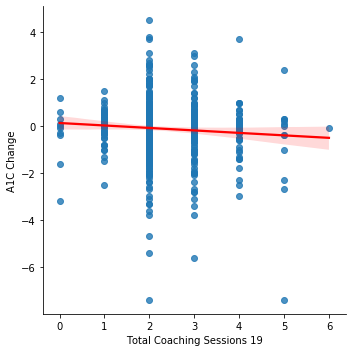

In [46]:
#sns.set_theme(color_codes=True)
plotty = sns.lmplot(x = 'Total Coaching Sessions 19', y= 'A1C Change', data = diabetes,palette="muted",line_kws={'color': 'red'})#, ci = None)#, color = 'r')
#plt.savefig("coachingscat1.png")

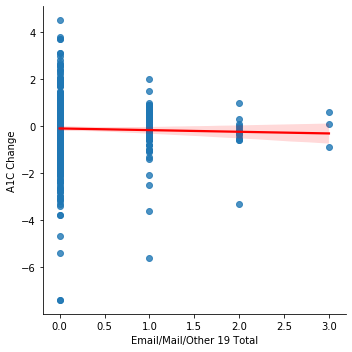

In [47]:
#sns.set_theme(color_codes=True)
plotty = sns.lmplot(x = 'Email/Mail/Other 19 Total', y= 'A1C Change', data = diabetes,palette="muted",line_kws={'color': 'red'})#, ci = None)#, color = 'r')
#plt.savefig("coachingscat1.png")

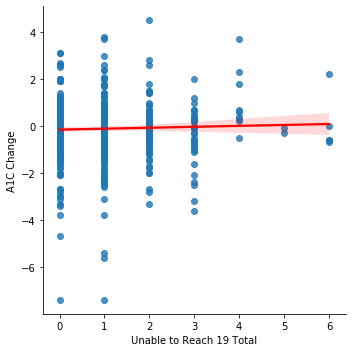

In [48]:
#sns.set_theme(color_codes=True)
plotty = sns.lmplot(x = 'Unable to Reach 19 Total', y= 'A1C Change', data = diabetes,line_kws={'color': 'red'})
#plt.savefig("coachingscat1.png")

<Figure size 432x468 with 0 Axes>

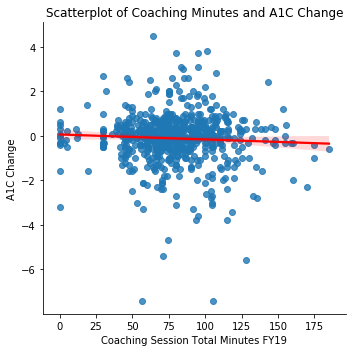

In [49]:
#sns.set_theme(color_codes=True)
plt.figure(figsize=(6,6.5))
sns.lmplot(x = 'Coaching Session Total Minutes FY19', y= 'A1C Change', data = diabetes,palette="muted",line_kws={'color': 'red'})#, ci = None)#, color = 'r')
plt.title("Scatterplot of Coaching Minutes and A1C Change")
plt.tight_layout()
plt.savefig("coachingscat1.png")

<Figure size 432x468 with 0 Axes>

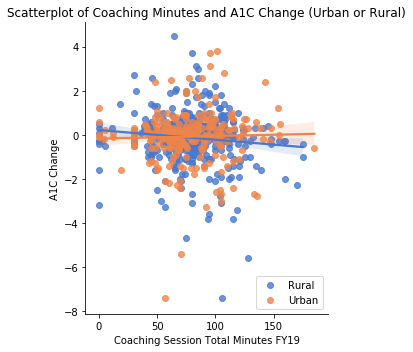

In [50]:
#sns.set_theme(color_codes=True)
plt.figure(figsize=(6,6.5))
plotty = sns.lmplot(x = 'Coaching Session Total Minutes FY19', y= 'A1C Change',hue = 'Urban or Rural', data = diabetes,palette="muted",legend_out=False)#, ci = None)#, color = 'r')
plt.title("Scatterplot of Coaching Minutes and A1C Change (Urban or Rural)")
plt.tight_layout()
plt.legend(loc='lower right')
plt.savefig("coachingscat2.png")

<Figure size 432x468 with 0 Axes>

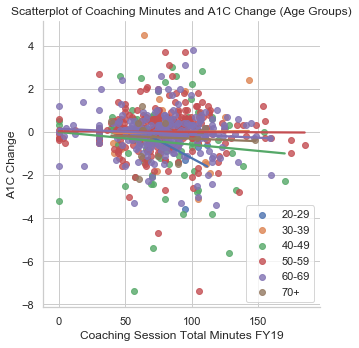

In [764]:
plt.figure(figsize=(6,6.5))
sns.lmplot(x = 'Coaching Session Total Minutes FY19', y= 'A1C Change',hue = 'Age Range', data = diabetes, ci = None,legend=False)#, color = 'r')
plt.title("Scatterplot of Coaching Minutes and A1C Change (Age Groups)")
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("coachingscat3.png")

### Sorting?

In [138]:
countsur = diabetes['Urban or Rural'].value_counts()
countsur
countsage = diabetes['Age Range'].groupby(diabetes['Urban or Rural']=='Urban').value_counts()
countsage

Urban or Rural  Age Range
False           50-59        164
                60-69        122
                40-49         76
                30-39         20
                70+            8
                20-29          5
True            50-59        102
                60-69         98
                40-49         26
                30-39         15
                70+            7
                20-29          1
Name: Age Range, dtype: int64

In [141]:
urbanvar = [1,15,26,102,98,7]
ruralvar = [5,20,76,164,122,8]

In [143]:
urbanvar

[1, 15, 26, 102, 98, 7]

### Line Graphs


In [51]:
#note some weirdness in may 2019
netrx = diabetes.iloc[:,[75,87,99,111,123,135,147,159,171,183,195,206,218,230,242,254,266,277,289]]
netrx2 = netrx.sum()
mos = ['Jul 18','Aug 18','Sep 18','Oct 18','Nov 18','Dec 18','Jan 19','Feb 19','Mar 19','Apr 19','May 19','Jun 19','Jul 19','Aug 19','Sep 19','Oct 19','Nov 19','Dec 19','Jan 20']
n = np.arange(19)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [54]:
diabetes.head()

Member ID Urban or Rural  Age  HeartDisease 2020  Diabetes 2020  \
0       1049          Rural   47                150            128   
1       1095          Rural   59                144            142   
2       1602          Rural   34                101            120   
3       1065          Urban   51                146            147   
4       1206          Urban   65                136            132   

   EmotionalHealth 2020  Cancer 2020  WholeHealthIndex 2020  \
0                    46           90                  -21.9   
1                    52           63                    2.6   
2                    15           29                   27.6   
3                    71           55                   -3.3   
4                    46           50                    0.6   

   HealthAwarenessIndex 2020  BiometricIndex 2020  FinancialHealthIndex 2020  \
0                         52                 28.0                       81.0   
1                         65                 56.0                       83.0   
2                        101                 28.0                       95.0   
3                         85                 50.0                       86.0   
4                         89                  5.0                       82.0   

   AlcoholUse 2020  MedicalAdherence 2020  Nutrition 2020  \
0               16                    9.0              37   
1                0                   11.0              24   
2                3                    9.0              19   
3               35                   11.0              75   
4                0                    9.0              32   

   PhysicalActivity 2020  TobaccoUse 2020  WeightManagement 2020  \
0                     96               81                    180   
1                     97                0                    180   
2                     53                0                    180   
3                     71                0                    180   
4                     93                0                    180   

   Depression 2020  Stress 2020  Sleep 2020  BMI 2020  Systolic 2020  \
0               35         35.0          31     34.95          130.0   
1               14         25.0          56     38.38          157.0   
2                7          3.0          31     46.20          166.0   
3               35         53.0          90     40.92          132.0   
4                7         10.0          78     33.25          142.0   

   Diastolic 2020  TotalCholesterol 2020  HDL 2020  HgbA1C 2020  \
0            80.0                  173.0      26.0          5.7   
1            77.0                  177.0      41.0          7.6   
2            87.0                  208.0      40.0         11.5   
3            73.0                  134.0      37.0          9.5   
4            86.0                  271.0      37.0         10.8   

   HeartDisease 2019  Diabetes 2019  EmotionalHealth 2019  Cancer 2019  \
0                113            115                    29           35   
1                140            141                    52           59   
2                104            123                    20           33   
3                140            153                    50           57   
4                128            128                    35           48   

   WholeHealthIndex 2019  HealthAwarenessIndex 2019  BiometricIndex 2019  \
0                   22.6                         85                   42   
1                    2.8                         69                   42   
2                   30.1                         76                   72   
3                    0.9                         54                   42   
4                   10.6                        104                   22   

   FinancialHealthIndex 2019  AlcoholUse 2019  MedicalAdherence 2019  \
0                       83.0                3                   32.0   
1                       79.0                0                   

In [52]:
netrx

Net Pay Rx July 2018  Net Pay Rx August 2018  Net Pay Rx September 2018  \
0                    0.00                  412.17                       9.43   
1                 1527.92                 2361.75                    1948.99   
2                   17.61                   71.70                       0.00   
3                  520.83                 1134.39                    3124.99   
4                   19.15                 4658.20                      16.96   
5                    0.00                 1185.20                     744.22   
6                  401.25                 1149.81                       0.00   
7                   22.60                   15.80                      20.22   
8                    0.00                 1371.93                       0.00   
9                    0.00                    0.00                    2505.75   
10                  42.23                 1753.94                       0.00   
11                   0.00                    5.95                     382.91   
12                2261.83                 2085.52                    1210.58   
13                   0.00                    0.00                       0.00   
14                   0.00                    0.00                       0.00   
16                 319.60                 1208.08                     902.96   
17                1322.32                   78.11                     816.91   
18                   0.00                   37.49                      84.37   
19                 544.12                  649.57                     493.31   
20                  22.36                 4056.35                       0.00   
21                   2.98                    2.98                    1326.09   
22                2185.25                  183.70                       0.00   
23                  70.06                   16.13                       0.00   
24                  17.68                   43.79                      45.81   
25                  89.29                  133.03                      50.22   
26                1246.73                    0.00                       2.44   
27                 490.48                  604.35                    1322.32   
28                9708.15                    0.00                     220.92   
29                2874.52                 3543.49                    3609.04   
30                   0.00                    0.00                      11.33   
31                2192.59                    0.00                       0.00   
32                   0.00                  827.53                    2353.18   
33                 503.71                  517.34                     896.48   
34                  17.05                    0.00                     156.63   
35                 211.27                    0.00                       0.00   
36                 106.19                    0.00                       0.00   
37                  43.94                   16.01                       0.00   
38                   8.90                  145.50                       3.30   
39                  17.81                   62.75                    3846.19   
40                   0.00                    0.00                    4137.25   
41                   0.00                   59.12                       0.00   
42                   4.71                   30.61                       0.00   
43                  27.72                 2478.37                      16.91   
44               11570.65                11911.82                       8.27   
45                1221.78                   35.70                     217.87   
46                1388.91                    0.00                       0.00   
47                   9.18                    3.54                     421.26   
48                   0.00                    0.00                       0.00   
49                   0.00                    0.00                     160.28   
50   

In [144]:
#note some weirdness in may 2019
netrxdia = diabetes.iloc[:,[76,88,100,112,124,136,148,160,172,184,196,207,219,231,243,255,267,278,290]]
netrxdia2 = netrxdia.sum()
netrxdia2

Net Pay Rx Diabetes Drugs July 2018         335708.65
Net Pay Rx Diabetes Drugs August 2018       424101.32
Net Pay Rx Diabetes Drugs September 2018    344645.60
Net Pay Rx Diabetes Drugs October 2018      392516.20
Net Pay Rx Diabetes Drugs November 2018     389045.38
Net Pay Rx Diabetes Drugs December 2018     374305.00
Net Pay Rx Diabetes Drugs January 2019      463750.18
Net Pay Rx Diabetes Drugs February 2019     471021.29
Net Pay Rx Diabetes Drugs March 2019        423854.82
Net Pay Rx Diabetes Drugs April 2019        495454.73
Net Pay Rx Diabetes Drugs May 2019          479074.11
Net Pay Rx Diabetes Drugs June 2019         490644.32
Net Pay Rx Diabetes Drugs July 2019         489970.66
Net Pay Rx Diabetes Drugs August 2019       475245.65
Net Pay Rx Diabetes Drugs September 2019    467170.31
Net Pay Rx Diabetes Drugs October 2019      548647.76
Net Pay Rx Diabetes Drugs November 2019     432264.73
Net Pay Rx Diabetes Drugs December 2019     501496.84
Net Pay Rx Diabetes Drugs Ja

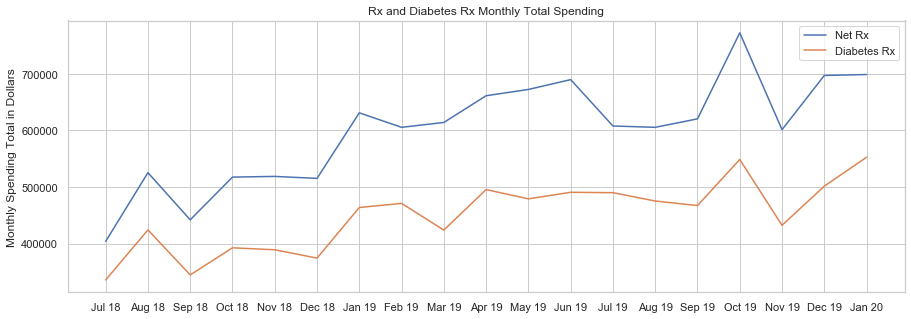

In [628]:
#plot graph
plt.figure(figsize=(15,5))
p1= sns.lineplot(mos,netrx2,label='Net Rx',sort=False)
p2= sns.lineplot(mos,netrxdia2,label='Diabetes Rx',sort=False)
plt.title('Rx and Diabetes Rx Monthly Total Spending')
#plt.legend([p1, p2], ['Net Rx', 'Diabetes Rx'])
plt.ylabel('Monthly Spending Total in Dollars')
plt.savefig("rxspending.png")

In [67]:
x = np.linspace(0, 18, 19)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [145]:
from scipy import stats
res = stats.linregress(x, netrxdia2)
res

LinregressResult(slope=8927.696157894727, intercept=369730.3903684211, rvalue=0.8101781809334437, pvalue=2.6122793350127182e-05, stderr=1566.6360862556955)

In [148]:
slope10 = (res.intercept*1.1 - res.intercept)/11
slope20 = (res.intercept*1.2 - res.intercept)/11
slope30 = (res.intercept*1.3 - res.intercept)/11

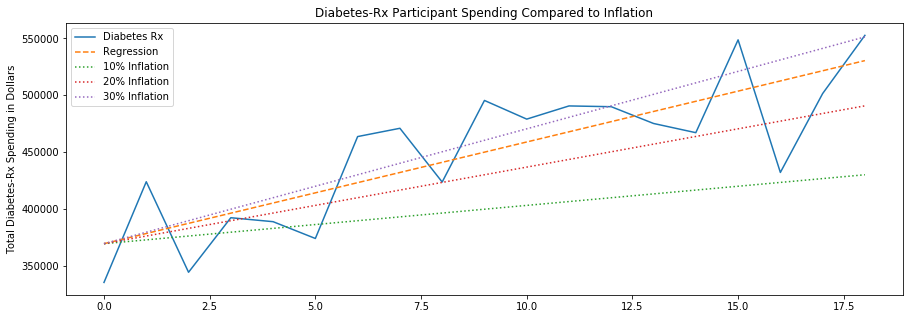

In [150]:
#plot graph
plt.figure(figsize=(15,5))
p1 = plt.plot(x,netrxdia2,label='Diabetes Rx')#,sort=False)
p2 = plt.plot(x,res.slope*x + res.intercept,linestyle='--',label='Regression')
p3 = plt.plot(x,slope10*x + res.intercept,label='10% Inflation',linestyle=':')
p4 = plt.plot(x,slope20*x + res.intercept,label='20% Inflation',linestyle=':')
p5 = plt.plot(x,slope30*x + res.intercept,label='30% Inflation',linestyle=':')
plt.title('Diabetes-Rx Participant Spending Compared to Inflation')
plt.legend()
plt.ylabel('Total Diabetes-Rx Spending in Dollars')
plt.savefig("drxinflationcomp.png")

In [56]:
#note some weirdness in may 2019
netmed = diabetes.iloc[:,[77,89,101,113,125,137,149,161,173,185,197,208,220,232,244,256,268,279,291]]
netmed2=netmed.sum()
netmed

Net Pay Med July 2018  Net Pay Med August 2018  \
0                     0.00                     0.00   
1                     0.00                   108.24   
2                     0.00                     0.00   
3                   573.30                   380.73   
4                   386.16                     0.00   
5                     0.00                     0.00   
6                    62.00                  1546.20   
7                     0.00                     0.00   
8                     0.00                  1355.40   
9                     0.00                     0.00   
10                    0.00                   264.03   
11                    0.00                   299.63   
12                    0.00                     0.00   
13                    0.00                     0.00   
14                  312.95                     0.00   
16                  136.37                     0.00   
17                    0.00                  1545.32   
18                    0.00                     0.00   
19                  312.95                     0.00   
20                  275.00                     0.00   
21                  236.79                     0.00   
22                    0.00                     0.00   
23                    3.00                     3.00   
24                    0.00                     0.00   
25                    0.00                     0.00   
26                    0.00                     0.00   
27                    0.00                     0.00   
28                    0.00                     0.00   
29                   70.33                   367.90   
30                    0.00                     0.00   
31                   15.00                     0.00   
32                    0.00                     0.00   
33                    0.00                     0.00   
34                  782.83                   512.93   
35                    9.29                     0.00   
36                    0.00                     0.00   
37                    0.00                     0.00   
38                    0.00                     0.00   
39                    0.00                   174.89   
40                    0.00                     0.00   
41                    0.00                     0.00   
42                    0.00                     0.00   
43                    0.00                     0.00   
44                    0.00                   123.77   
45                  717.16                     0.00   
46                    5.43                     0.00   
47                   71.88                     0.00   
48                    0.00                     0.00   
49                    0.00                     0.00   
50                   97.11                     0.00   
51                    0.00                   186.82   
52                    0.00                     0.00   
53                  174.89                     0.00   
54                    0.00                     0.00   
55                    0.00                     0.00   
56                  206.72                   312.95   
57                    0.00                     0.00   
58                    0.00                   401.91   
59                    0.00                  1217.40   
60                    0.00                   276.08   
61                  623.53                     0.00   
62                    0.00                     0.00   
63                    0.00                     0.00   
64                    0.00                     0.00   
65                    0.00                     0.00   
66                    0.00                     0.00   
67                    0.00                     0.00   
68                    0.00                     0.00   
69                    0.00                  1038.33   
70                    0.00                     0.00   
71                    0.00                     0.00   
72                  162.21                   

In [207]:
#note some weirdness in may 2019
netmeddia = diabetes.iloc[:,[78,90,102,114,126,138,150,162,174,186,198,209,221,233,245,257,269,280,292]]
netmeddia2 = netmeddia.sum()
netmeddia2

Net Pay Med Epis Diabetes July 2018           8544.96
Net Pay Med Epis Diabetes August 2018        59711.16
Net Pay Med Epis Diabetes September 2018     51667.56
Net Pay Med Epis Diabetes October 2018       59575.36
Net Pay Med Epis Diabetes November 2018      69545.56
Net Pay Med Epis Diabetes December 2018     106817.29
Net Pay Med Epis Diabetes January 2019       33596.15
Net Pay Med Epis Diabetes February 2019      45740.54
Net Pay Med Epis Diabetes March 2019         78618.72
Net Pay Med Epis Diabetes April 2019         61204.26
Net Pay Med Epis Diabetes May 2019           85150.91
Net Pay Med Epis Diabetes June 2019          84823.97
Net Pay Med Epis Diabetes July 2019          64344.17
Net Pay Med Epis Diabetes August 2019        75025.84
Net Pay Med Epis Diabetes September 2019     54024.02
Net Pay Med Epis Diabetes October 2019       61984.61
Net Pay Med Epis Diabetes November 2019      65453.32
Net Pay Med Epis Diabetes December 2019      86647.26
Net Pay Med Epis Diabetes Ja

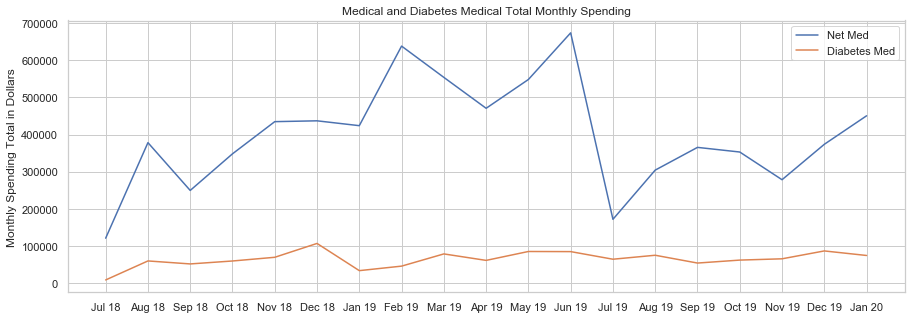

In [629]:
#plot graph
plt.figure(figsize=(15,5))
p1= sns.lineplot(mos,netmed2,label='Net Med',sort=False)
p2= sns.lineplot(mos,netmeddia2,label='Diabetes Med',sort=False)
plt.title('Medical and Diabetes Medical Total Monthly Spending')
plt.ylabel('Monthly Spending Total in Dollars')
plt.savefig("medspending.png")

In [502]:
netrx3 = diabetes.iloc[:,[75,87,99,111,123,135,147,159,171,183,195,206,218,230,242,254,266,277,289]]
netrx4 = netrx3.mean()

Net Pay Rx July 2018          627.075466
Net Pay Rx August 2018        815.761040
Net Pay Rx September 2018     686.311009
Net Pay Rx October 2018       803.587500
Net Pay Rx November 2018      805.470823
Net Pay Rx December 2018      800.045093
Net Pay Rx January 2019       979.983447
Net Pay Rx February 2019      940.209068
Net Pay Rx March 2019         953.565109
Net Pay Rx April 2019        1026.936925
Net Pay Rx May 2019          1044.145947
Net Pay Rx June 2019         1071.144224
Net Pay Rx July 2019          943.858960
Net Pay Rx August 2019        940.217407
Net Pay Rx September 2019     963.406817
Net Pay Rx October 2019      1199.512811
Net Pay Rx November 2019      933.750839
Net Pay Rx December 2019     1082.527593
Net Pay Rx January 2020      1085.128494
dtype: float64

In [577]:
netrxdia3 = diabetes.iloc[:,[76,88,100,112,124,136,148,160,172,184,196,207,219,231,243,255,267,278,290]]
netrxdia4 = netrxdia3.mean()

In [578]:
#note some weirdness in may 2019
netmed3 = diabetes.iloc[:,[77,89,101,113,125,137,149,161,173,185,197,208,220,232,244,256,268,279,291]]
netmed4=netmed3.mean()
#netmed4.max()

In [579]:
#note some weirdness in may 2019
netmeddia3 = diabetes.iloc[:,[78,90,102,114,126,138,150,162,174,186,198,209,221,233,245,257,269,280,292]]
netmeddia4 = netmeddia3.mean()
#netmeddia4

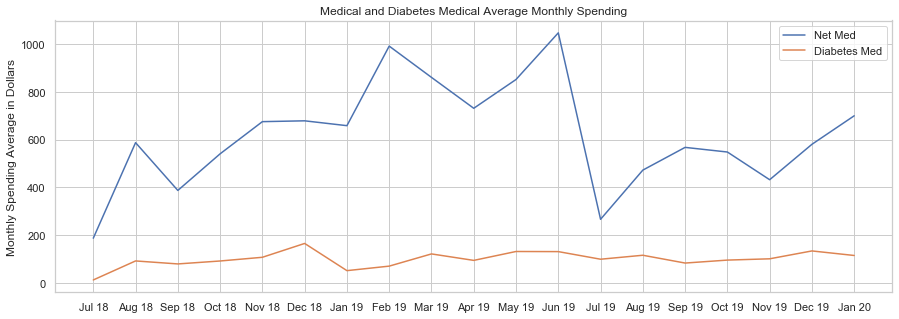

In [630]:
plt.figure(figsize=(15,5))
p1= sns.lineplot(mos,netmed4,label='Net Med',sort=False)
p2= sns.lineplot(mos,netmeddia4,label='Diabetes Med',sort=False)
plt.title('Medical and Diabetes Medical Average Monthly Spending')
plt.ylabel('Monthly Spending Average in Dollars')
#plt.show()
plt.savefig("medspendingavg.png")

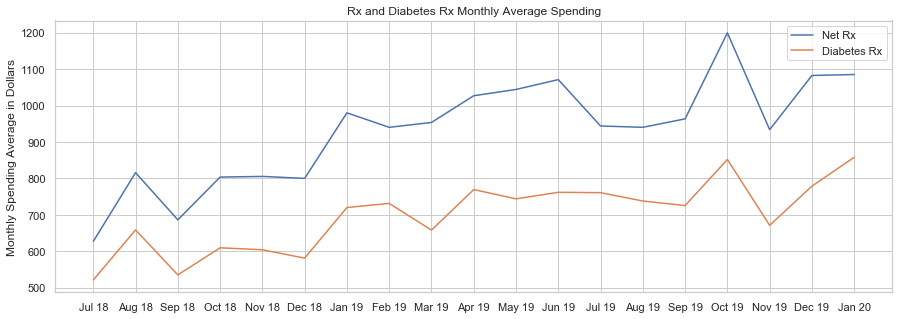

In [631]:
#plot graph
plt.figure(figsize=(15,5))
p1= sns.lineplot(mos,netrx4,label='Net Rx',sort=False)
p2= sns.lineplot(mos,netrxdia4,label='Diabetes Rx',sort=False)
plt.title('Rx and Diabetes Rx Monthly Average Spending')
#plt.legend([p1, p2], ['Net Rx', 'Diabetes Rx'])
plt.ylabel('Monthly Spending Average in Dollars')
#plt.show()
plt.savefig("rxspendingavg.png")

### Control Group Changes

In [582]:
bettergroup = diabetes[diabetes.ControlChange=='Better Control Group']
worsegroup = diabetes[diabetes.ControlChange=='Worse Control Group']
samegroup = diabetes[diabetes.ControlChange=='Same Control Group']

In [583]:
netrxbetter = bettergroup.iloc[:,[75,87,99,111,123,135,147,159,171,183,195,206,218,230,242,254,266,277,289]]
netrxbetterer = netrxbetter.mean()
netrxworse = worsegroup.iloc[:,[75,87,99,111,123,135,147,159,171,183,195,206,218,230,242,254,266,277,289]]
netrxworser = netrxworse.mean()
netrxsame = samegroup.iloc[:,[75,87,99,111,123,135,147,159,171,183,195,206,218,230,242,254,266,277,289]]
netrxsamer = netrxsame.mean()

In [585]:
netrxdiabetter = bettergroup.iloc[:,[76,88,100,112,124,136,148,160,172,184,196,207,219,231,243,255,267,278,290]]
netrxdiabetterer = netrxdiabetter.mean()
netrxdiaworse = worsegroup.iloc[:,[76,88,100,112,124,136,148,160,172,184,196,207,219,231,243,255,267,278,290]]
netrxdiaworser = netrxdiaworse.mean()
netrxdiasame = samegroup.iloc[:,[76,88,100,112,124,136,148,160,172,184,196,207,219,231,243,255,267,278,290]]
netrxdiasamer = netrxdiasame.mean()

In [584]:
netmedbetter = bettergroup.iloc[:,[77,89,101,113,125,137,149,161,173,185,197,208,220,232,244,256,268,279,291]]
netmedbetterer=netmedbetter.mean()
netmedworse = worsegroup.iloc[:,[77,89,101,113,125,137,149,161,173,185,197,208,220,232,244,256,268,279,291]]
netmedworser=netmedworse.mean()
netmedsame = samegroup.iloc[:,[77,89,101,113,125,137,149,161,173,185,197,208,220,232,244,256,268,279,291]]
netmedsamer=netmedsame.mean()

In [586]:
netmeddiabetter = bettergroup.iloc[:,[78,90,102,114,126,138,150,162,174,186,198,209,221,233,245,257,269,280,292]]
netmeddiabetterer = netmeddiabetter.mean()
netmeddiaworse = worsegroup.iloc[:,[78,90,102,114,126,138,150,162,174,186,198,209,221,233,245,257,269,280,292]]
netmeddiaworser = netmeddiaworse.mean()
netmeddiasame = samegroup.iloc[:,[78,90,102,114,126,138,150,162,174,186,198,209,221,233,245,257,269,280,292]]
netmeddiasamer = netmeddiasame.mean()

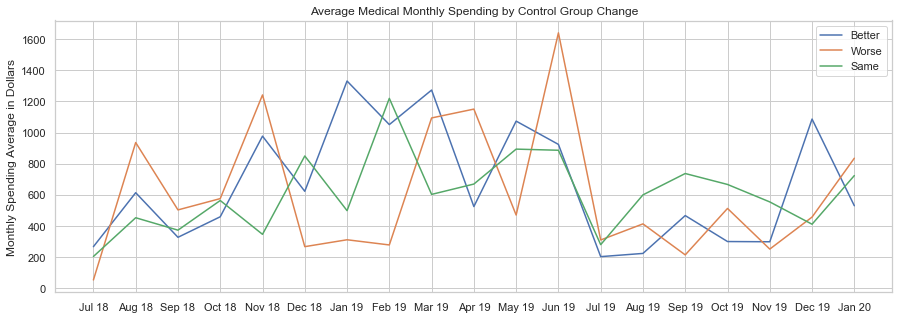

In [632]:
plt.figure(figsize=(15,5))
p1= sns.lineplot(mos,netmedbetterer,label='Better',sort=False)
p2= sns.lineplot(mos,netmedworser,label='Worse',sort=False)
p3= sns.lineplot(mos,netmedsamer,label='Same',sort=False)
plt.title('Average Medical Monthly Spending by Control Group Change')
plt.ylabel('Monthly Spending Average in Dollars')
#plt.show()
plt.savefig("medcontrolg.png")

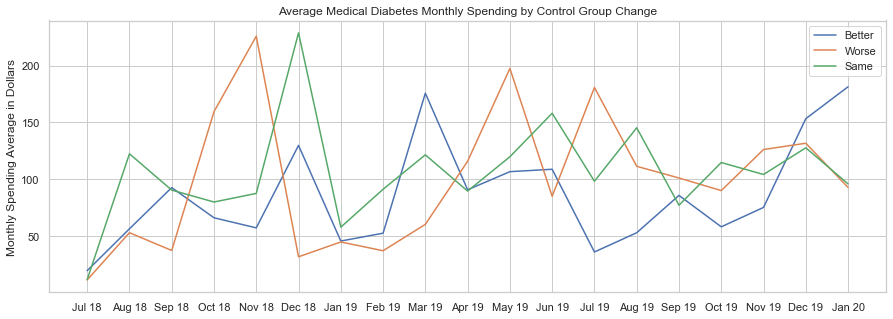

In [633]:
plt.figure(figsize=(15,5))
p1= sns.lineplot(mos,netmeddiabetterer,label='Better',sort=False)
p2= sns.lineplot(mos,netmeddiaworser,label='Worse',sort=False)
p3= sns.lineplot(mos,netmeddiasamer,label='Same',sort=False)
plt.title('Average Medical Diabetes Monthly Spending by Control Group Change')
plt.ylabel('Monthly Spending Average in Dollars')
#plt.show()
plt.savefig("meddiacontrolg.png")

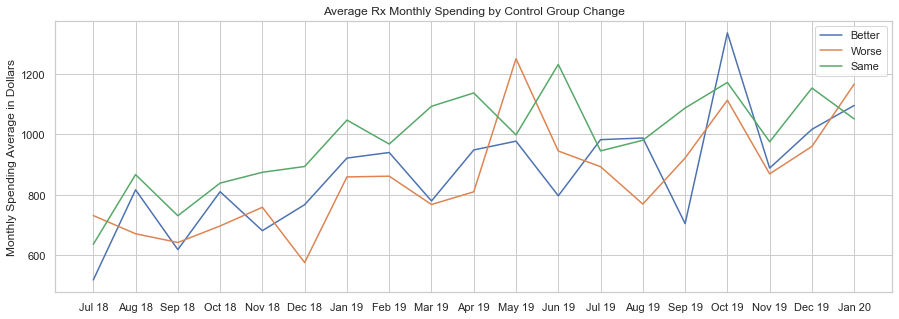

In [634]:
plt.figure(figsize=(15,5))
p1= sns.lineplot(mos,netrxbetterer,label='Better',sort=False)
p2= sns.lineplot(mos,netrxworser,label='Worse',sort=False)
p3= sns.lineplot(mos,netrxsamer,label='Same',sort=False)
plt.title('Average Rx Monthly Spending by Control Group Change')
plt.ylabel('Monthly Spending Average in Dollars')
#plt.show()
plt.savefig("rxcontrolg.png")

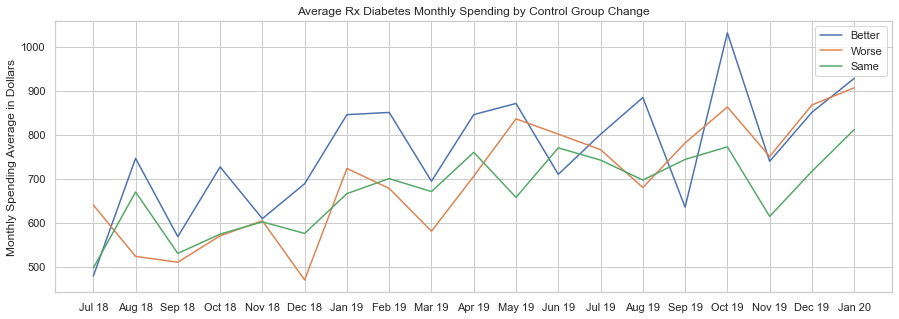

In [635]:
#plot graph
plt.figure(figsize=(15,5))
p1= sns.lineplot(mos,netrxdiabetterer,label='Better',sort=False)
p2= sns.lineplot(mos,netrxdiaworser,label='Worse',sort=False)
p3= sns.lineplot(mos,netrxdiasamer,label='Same',sort=False)
plt.title('Average Rx Diabetes Monthly Spending by Control Group Change')
#plt.legend([p1, p2], ['Net Rx', 'Diabetes Rx'])
plt.ylabel('Monthly Spending Average in Dollars')
#plt.show()
plt.savefig("rxdiacontrolg.png")

### Pie Charts

In [282]:
diabetes['ControlChange'].groupby(diabetes['PosorNegA1C']).value_counts()

PosorNegA1C   ControlChange       
Decrease A1C  Same Control Group      197
              Better Control Group    153
Increase A1C  Same Control Group      165
              Worse Control Group     129
Name: ControlChange, dtype: int64

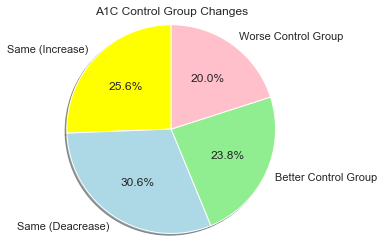

In [334]:
# defining labels 
activities = ['Same (Increase)','Same (Deacrease)', 'Better Control Group', 'Worse Control Group'] 
  
# portion covered by each label 
slices = [165, 197, 153, 129] 
  
# color for each label 
colors = ['yellow', 'lightblue', 'lightgreen','pink'] 
  
# plotting the pie chart 
plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, 
        radius = 1.2, autopct = '%1.1f%%') 
  
# plotting legend 
#plt.legend(bbox_to_anchor=(1.9, 0.75)) 
plt.title("A1C Control Group Changes")
  
# showing the plot 
#plt.show() 

plt.savefig("ControlGroupPie.png")

### Histograms

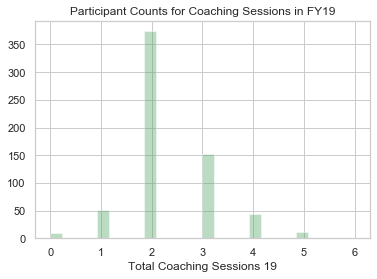

In [806]:
#import seaborn as sns
#sns.set_theme(style="ticks")

sns.distplot(diabetes['Total Coaching Sessions 19'],kde=False,color='g')#, hue="Urban or Rural")
plt.title("Participant Counts for Coaching Sessions in FY19")
plt.savefig("coachinghist.png")

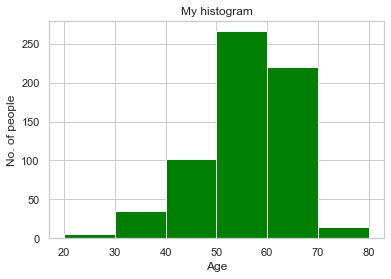

In [159]:
# # setting the ranges and no. of intervals 
range = (20, 80) 
bins = 6  

# plotting a histogram 
plt.hist(diabetes['Age'] , bins, range, color = 'green', 
        histtype = 'bar')#, rwidth = 1) 
  
# x-axis label 
plt.xlabel('Age') 
# frequency label 
plt.ylabel('No. of people') 
# plot title 
plt.title('My histogram') 
  
# function to show the plot 
plt.show()

### Scatterplots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


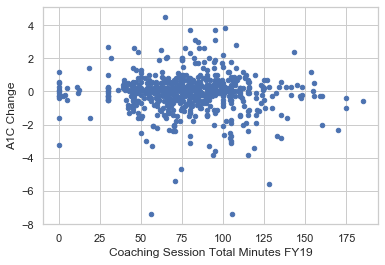

In [324]:
plot = diabetes.plot.scatter(x='Coaching Session Total Minutes FY19', y='A1C Change')

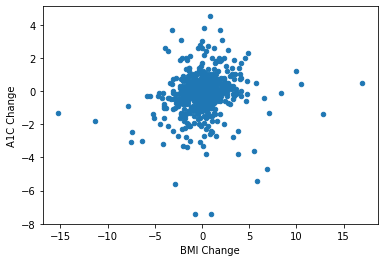

In [77]:
plot = diabetes.plot.scatter(x='BMI Change', y='A1C Change')

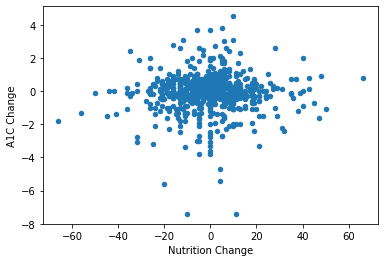

In [78]:
plot = diabetes.plot.scatter(x='Nutrition Change', y='A1C Change')

### Boxplots (seaborn)

In [843]:
diabetes["Total Coaching Sessions 19"] = diabetes["Total Coaching Sessions 19"].astype('category')
diabetes["Email/Mail/Other 19 Total"] = diabetes["Email/Mail/Other 19 Total"].astype('category')
diabetes["Unable to Reach 19 Total"] = diabetes["Unable to Reach 19 Total"].astype('category')

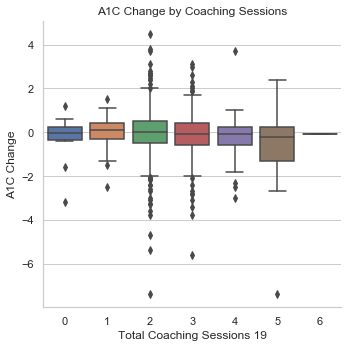

In [852]:
sns.catplot(x="Total Coaching Sessions 19", y="A1C Change", kind="box", data=diabetes)
plt.title("A1C Change by Coaching Sessions")
plt.tight_layout()
plt.savefig("coachingseshbox.png")

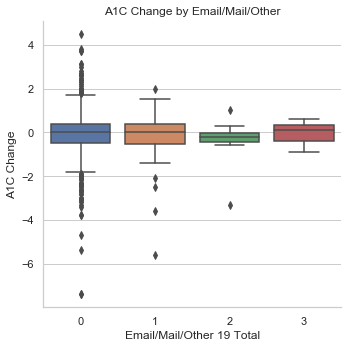

In [853]:
boxplot = sns.catplot(x="Email/Mail/Other 19 Total", y="A1C Change", kind="box", data=diabetes)
plt.title("A1C Change by Email/Mail/Other")
plt.tight_layout()
plt.savefig("emailbox.png")

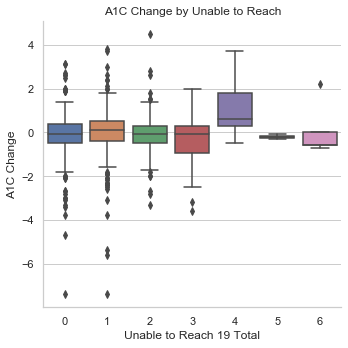

In [854]:
boxplot = sns.catplot(x="Unable to Reach 19 Total", y="A1C Change", kind="box", data=diabetes)
plt.title("A1C Change by Unable to Reach")
plt.tight_layout()
plt.savefig("missingseshbox.png")

### Stripplot

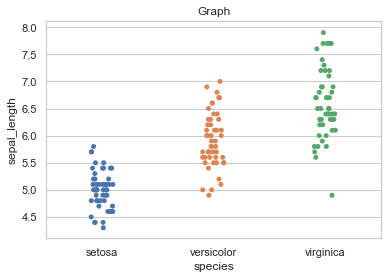

In [85]:
# use to set style of background of plot 
sns.set(style ="whitegrid") 
  
# loading data-set 
iris = sns.load_dataset('iris'); 
  
# plotting strip plot with seaborn 
# deciding the attributes of dataset on which plot should be made 
ax = sns.stripplot(x = 'species', y = 'sepal_length', data = iris); 
  
# giving title to the plot 
plt.title('Graph') 
  
# function to show plot 
plt.show() 

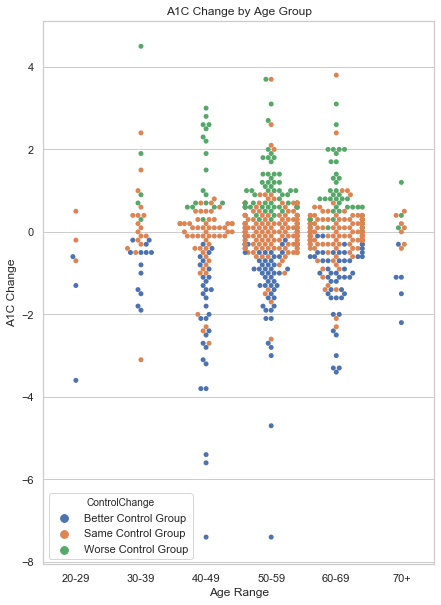

In [735]:
# use to set style of background of plot 
sns.set(style ="whitegrid") 
  
# loading data-set 
#iris = sns.load_dataset('iris'); 
  
# plotting strip plot with seaborn 
# deciding the attributes of dataset on which plot should be made 
plt.figure(figsize=(7,10))
ax = sns.swarmplot(x = 'Age Range', y = 'A1C Change',hue='ControlChange', data = diabetes); 
plt.title("A1C Change by Age Group")
plt.savefig("swarmplotage.png")

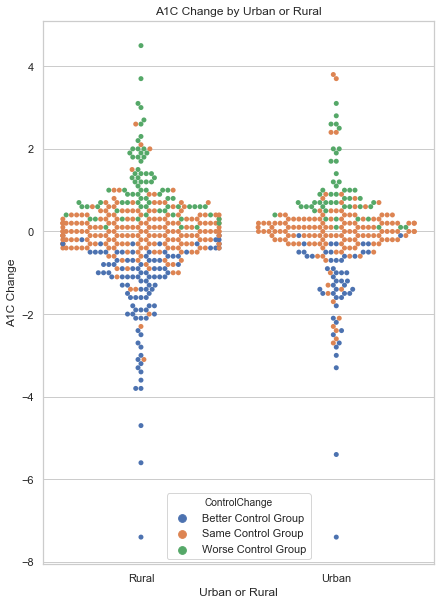

In [736]:
# use to set style of background of plot 
sns.set(style ="whitegrid") 
  
# loading data-set 
#iris = sns.load_dataset('iris'); 
plt.figure(figsize=(7,10))
# plotting strip plot with seaborn 
# deciding the attributes of dataset on which plot should be made 
sns.swarmplot(x = 'Urban or Rural', y = 'A1C Change',hue='ControlChange', data = diabetes); 

# giving title to the plot 
plt.title("A1C Change by Urban or Rural")

  
# function to show plot 
#plt.show() 

plt.savefig("swarmplotur.png")

### Categorical Scatterplot with seaborn

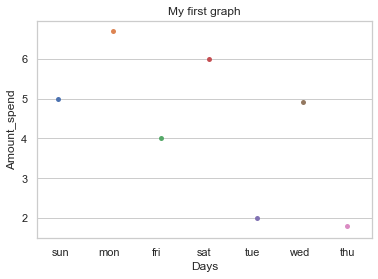

In [87]:
# x axis values 
x =['sun', 'mon', 'fri', 'sat', 'tue', 'wed', 'thu'] 
  
# y axis values 
y =[5, 6.7, 4, 6, 2, 4.9, 1.8] 
  
# plotting strip plot with seaborn 
ax = sns.stripplot(x, y); 
  
# giving labels to x-axis and y-axis 
ax.set(xlabel ='Days', ylabel ='Amount_spend') 
  
# giving title to the plot 
plt.title('My first graph'); 
  
# function to show plot 
plt.show() 

### Heatmaps

In [378]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': False})

In [860]:
corvars = diabetes[['Coaching Session Total Minutes FY19','A1C Change','HeartDisease Change','Diabetes Change','EmotionalHealth Change','Cancer Change','WholeHealthIndex Change','BiometricIndex Change','FinancialHealthIndex Change','HealthAwarenessIndex Change','Depression Change','Stress Change','Sleep Change']]
#corvars.corr()
corvars2 = corvars.corr().iloc[:,0]
corvars2.transpose()

Coaching Session Total Minutes FY19    1.000000
A1C Change                            -0.055371
HeartDisease Change                   -0.073741
Diabetes Change                       -0.079885
EmotionalHealth Change                -0.036091
Cancer Change                         -0.004006
WholeHealthIndex Change                0.041193
BiometricIndex Change                  0.068228
FinancialHealthIndex Change           -0.027630
HealthAwarenessIndex Change           -0.045159
Depression Change                     -0.030831
Stress Change                         -0.004554
Sleep Change                          -0.023953
Name: Coaching Session Total Minutes FY19, dtype: float64

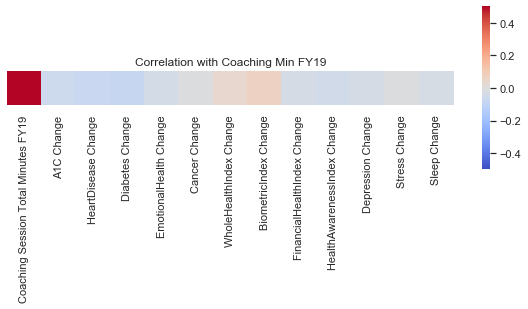

AttributeError: 'NoneType' object has no attribute 'T'

In [863]:
plt.figure(figsize=(10,10))
#matrix = np.triu(corvars.corr())
p3 = sns.heatmap([corvars2],annot=False,vmin=-.5, vmax=.5, center= 0,cmap= 'coolwarm',square=True,yticklabels=False, xticklabels=['Coaching Session Total Minutes FY19','A1C Change','HeartDisease Change','Diabetes Change','EmotionalHealth Change','Cancer Change','WholeHealthIndex Change','BiometricIndex Change','FinancialHealthIndex Change','HealthAwarenessIndex Change','Depression Change','Stress Change','Sleep Change'],cbar_kws={'shrink':0.3})
p3.set_xticklabels(p3.get_xticklabels(), rotation = 90) 
plt.title("Correlation with Coaching Min FY19")
#plt.tight_layout()
#plt.show().T

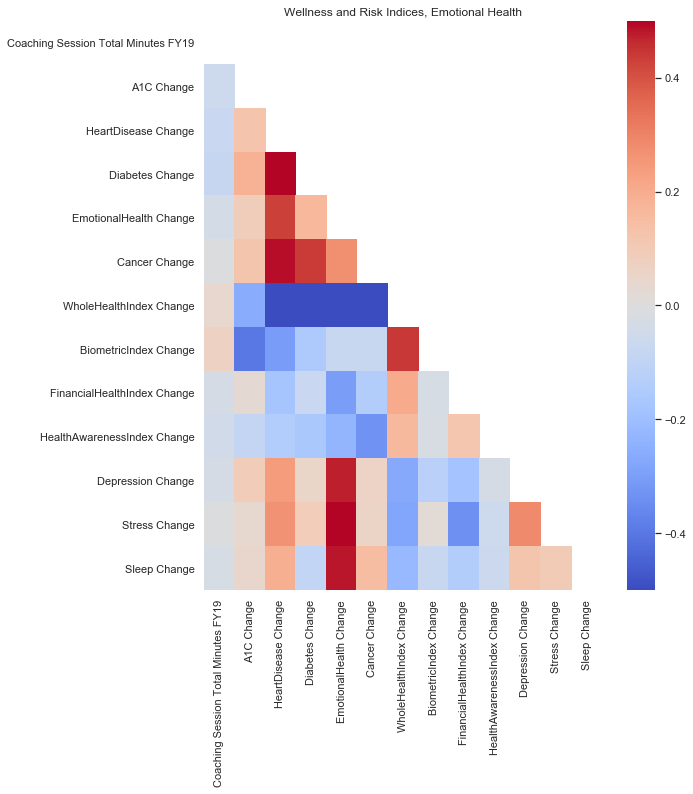

In [732]:
plt.figure(figsize=(10,11))
matrix = np.triu(corvars.corr())
p3 = sns.heatmap(corvars.corr(),annot=False,vmin=-.5, vmax=.5, center= 0,cmap= 'coolwarm',mask=matrix)
plt.tight_layout()
plt.title("Wellness and Risk Indices, Emotional Health")
plt.savefig("heatmap1.png")

In [ ]:
corvars = diabetes[['A1C Change','HeartDisease Change','Diabetes Change','EmotionalHealth Change','Cancer Change','WholeHealthIndex Change','BiometricIndex Change','FinancialHealthIndex Change']]

In [350]:
corvar4 = diabetes[['Coaching Session Total Minutes FY19','A1C Change','Depression Change','Stress Change','Sleep Change']]

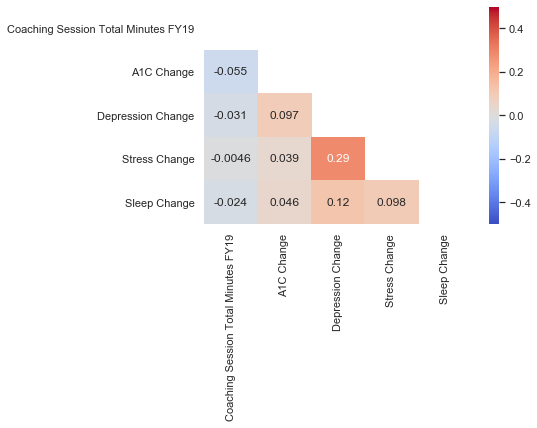

In [351]:
matrix = np.triu(corvar4.corr())
sns.heatmap(corvar4.corr(),annot=True,vmin=-.5, vmax=.5, center= 0,cmap= 'coolwarm',mask=matrix)

In [348]:
corvar2 = diabetes[['Coaching Session Total Minutes FY19','A1C Change','AlcoholUse Change','MedicalAdherence Change','Nutrition Change','PhysicalActivity Change','TobaccoUse Change','WeightManagement Change']]

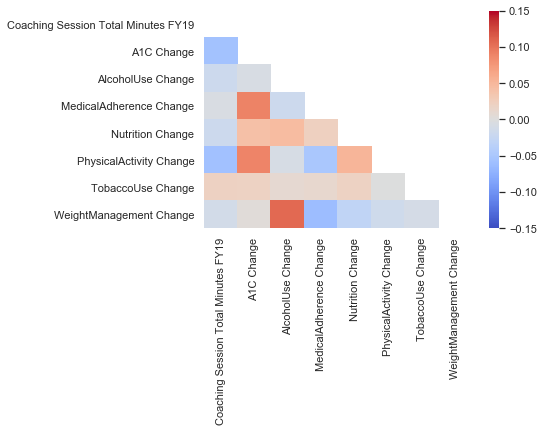

In [384]:
matrix = np.triu(corvar2.corr())
p4 = sns.heatmap(corvar2.corr(),annot=False,vmin=-.15, vmax=.15, center= 0,cmap= 'coolwarm',mask=matrix)
#plt.tight_layout()

In [360]:
corvar3 = diabetes[['Coaching Session Total Minutes FY19','A1C Change','BMI Change','Systolic Change','Diastolic Change','TotalCholesterol Change','HDL Change','AlcoholUse Change','MedicalAdherence Change','Nutrition Change','PhysicalActivity Change','TobaccoUse Change','WeightManagement Change']]

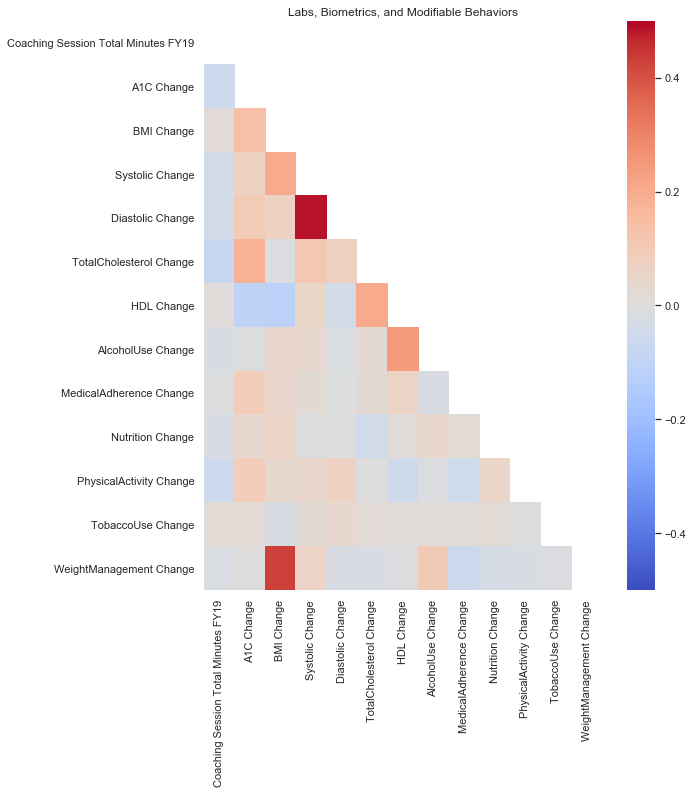

In [734]:
plt.figure(figsize=(10,11))
matrix = np.triu(corvar3.corr())
p4 = sns.heatmap(corvar3.corr(),annot=False,vmin=-.5, vmax=.5, center= 0,cmap= 'coolwarm',mask=matrix)
plt.tight_layout()
plt.title("Labs, Biometrics, and Modifiable Behaviors")
plt.savefig("heatmap2.png")

In [215]:
diabetes.dtypes

Member ID                                            int64
Urban or Rural                                    category
Age                                                  int64
HeartDisease 2020                                    int64
Diabetes 2020                                        int64
EmotionalHealth 2020                                 int64
Cancer 2020                                          int64
WholeHealthIndex 2020                              float64
HealthAwarenessIndex 2020                            int64
BiometricIndex 2020                                float64
FinancialHealthIndex 2020                          float64
AlcoholUse 2020                                      int64
MedicalAdherence 2020                              float64
Nutrition 2020                                       int64
PhysicalActivity 2020                                int64
TobaccoUse 2020                                      int64
WeightManagement 2020                                int

# Analysis

### Decision Trees

In [160]:
# #split dataset in features and target variable
feature_cols = ['BMI Change','Systolic Change','Diastolic Change','TotalCholesterol Change','HDL Change']
feature_cols2 = ['Sleep Change','Stress Change','Depression Change','WeightManagement Change','TobaccoUse Change','PhysicalActivity Change','Nutrition Change','MedicalAdherence Change','AlcoholUse Change','FinancialHealthIndex Change']

X = diabetes[feature_cols2] # Features
y = diabetes['PosorNegA1C'] # Target variable

In [546]:
diabetes['PosorNegA1C']

0      Decrease A1C
1      Decrease A1C
2      Increase A1C
3      Increase A1C
4      Increase A1C
5      Increase A1C
6      Increase A1C
7      Increase A1C
8      Increase A1C
9      Increase A1C
10     Decrease A1C
11     Increase A1C
12     Increase A1C
13     Increase A1C
14     Increase A1C
16     Increase A1C
17     Decrease A1C
18     Increase A1C
19     Increase A1C
20     Decrease A1C
21     Increase A1C
22     Decrease A1C
23     Decrease A1C
24     Increase A1C
25     Decrease A1C
26     Increase A1C
27     Increase A1C
28     Increase A1C
29     Increase A1C
30     Increase A1C
31     Increase A1C
32     Decrease A1C
33     Increase A1C
34     Increase A1C
35     Increase A1C
36     Decrease A1C
37     Decrease A1C
38     Increase A1C
39     Increase A1C
40     Decrease A1C
41     Increase A1C
42     Increase A1C
43     Increase A1C
44     Decrease A1C
45     Decrease A1C
46     Decrease A1C
47     Decrease A1C
48     Decrease A1C
49     Decrease A1C
50     Increase A1C


In [159]:
y_train.value_counts()

Decrease A1C    257
Increase A1C    193
Name: PosorNegA1C, dtype: int64

In [161]:
# # Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [194]:
# # Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# # Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# #Predict the response for test dataset
y_pred = clf.predict(X_test)

In [171]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [196]:
# # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4742268041237113


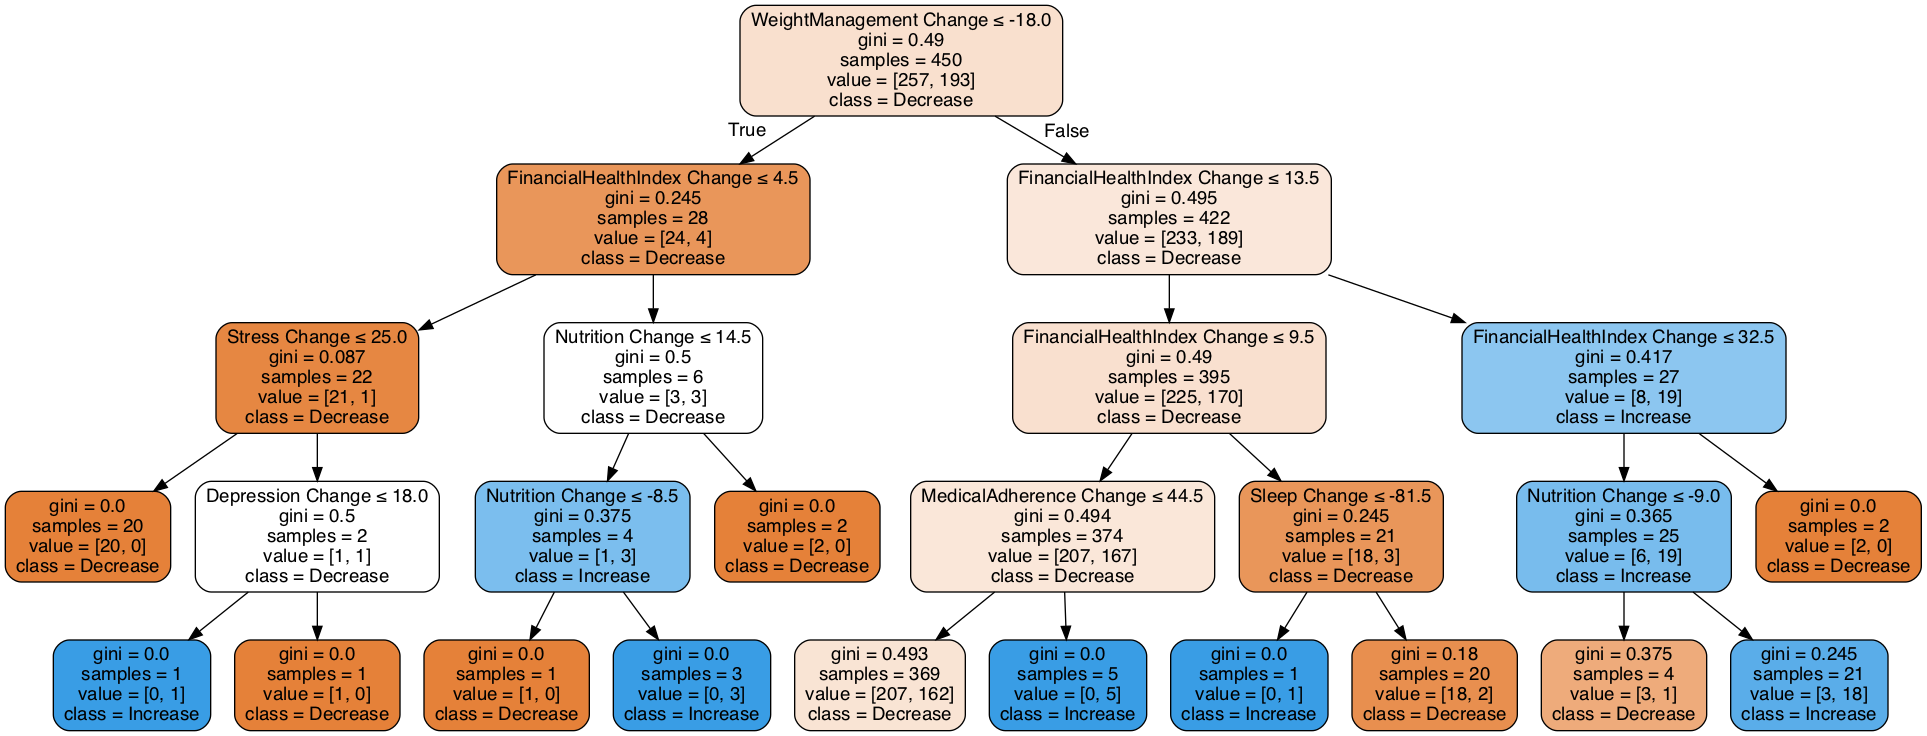

In [204]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols2,class_names=['Decrease','Increase'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetestree.png')
Image(graph.create_png())

In [174]:
clf.feature_importances_

array([0.11051172, 0.08558986, 0.06545355, 0.12129973, 0.        ,
       0.07379184, 0.1260858 , 0.14328226, 0.04169892, 0.23228632])

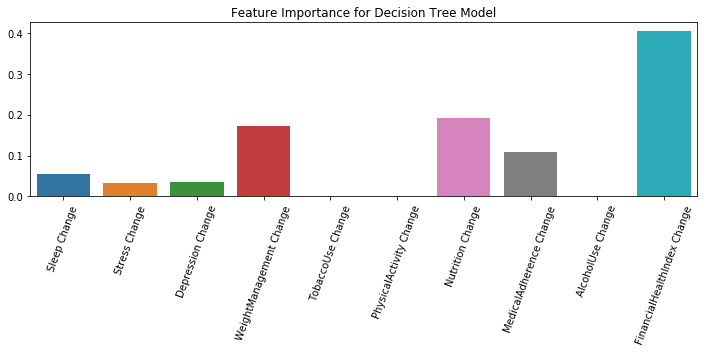

In [206]:
plt.figure(figsize=(10,5))
p10 = sns.barplot(feature_cols2,clf.feature_importances_)
plt.title("Feature Importance for Decision Tree Model")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("featimportance2.png")

In [552]:
# Create a simple regression model
diabetes['Coaching Session Total Minutes FY19'] = diabetes['Coaching Session Total Minutes FY19'].fillna((diabetes['Coaching Session Total Minutes FY19'].mean()))

diabetes['Coaching Session Total Minutes FY19'].isnull().sum()

X = diabetes["Coaching Session Total Minutes FY19"]
y = diabetes["HgbA1C 2019"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

model.plot()

ax.plot(X, y_pred, '-', color='darkorchid', linewidth=2)

Feature: 0, Score: 0.38707
Feature: 1, Score: 0.10068
Feature: 2, Score: 0.13713
Feature: 3, Score: 0.25417
Feature: 4, Score: 0.12095


TypeError: 'tuple' object is not callable